#                                        Real / Fake job prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1. Loadig the Data Set

In [2]:
pro = pd.read_csv("N:\\Data Analytics Course\\Capstone Projects\\Our Project\\Job.csv", index_col = 'job_id')

pro

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0


In [3]:
type(pro)

pandas.core.frame.DataFrame

In [4]:
pro.shape

(17880, 17)

In [5]:
pro.size

303960

In [6]:
pro.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:
pro.head(10)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0


In [8]:
pro.dtypes

title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [9]:
pro.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [10]:
pro.describe(include = 'all')

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880,17534,6333,2868,14572,17879,15185,10670,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,11231,3105,1337,874,1709,14801,11968,6205,NaN,NaN,NaN,5,7,13,131,37,NaN
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


In [11]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17880 entries, 1 to 17880
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

### 2. Missing Value Imputation

In [12]:
pro.isnull().sum() / len(pro) * 100

title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [13]:
pro['requirements'] = pro['requirements'].fillna(pro['requirements'].mode()[0])
pro['employment_type'] = pro['employment_type'].fillna(pro['employment_type'].mode()[0])
pro['required_experience'] = pro['required_experience'].fillna(pro['required_experience'].mode()[0])
pro['required_education'] = pro['required_education'].fillna(pro['required_education'].mode()[0])
pro['required_education'] = pro['required_education'].fillna(pro['required_education'].mode()[0])
pro['location'] = pro['location'].fillna(pro['location'].mode()[0])
pro['description'] = pro['description'].fillna(pro['description'].mode()[0])

In [14]:
pro.drop(['department', 'salary_range', 'company_profile', 'benefits', 'industry', 'function'], axis = 1, inplace = True)

In [15]:
pro.head(10)

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
job_id,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,Bachelor's Degree,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever","Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,Account Executive - Washington DC,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
5,Bill Review Manager,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
6,Accounting Clerk,"US, MD,",Job OverviewApex is an environmental consultin...,University degree required. TEFL / TESOL / CEL...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,0
7,Head of Content (m/f),"DE, BE, Berlin",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,0,1,1,Full-time,Mid-Senior level,Master's Degree,0
8,Lead Guest Service Specialist,"US, CA, San Francisco",Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
9,HP BSM SME,"US, FL, Pensacola",Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,0,1,1,Full-time,Associate,Bachelor's Degree,0


In [16]:
pro.isnull().sum()

title                  0
location               0
description            0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
fraudulent             0
dtype: int64

### 3. Data Visualization

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

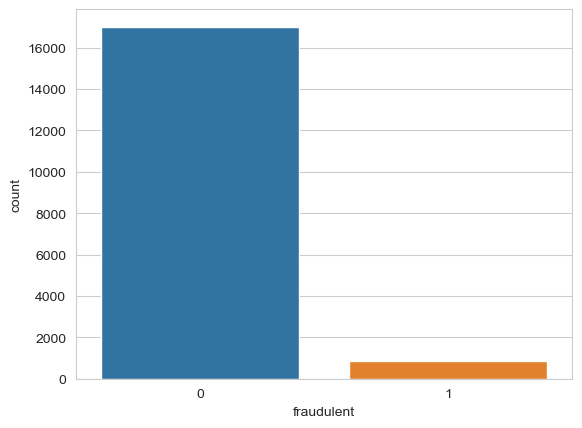

In [17]:
sns.set_style('whitegrid')
sns.countplot(x = 'fraudulent', data = pro)

In [19]:
title = pro.title.value_counts()[:5]

title

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
Name: title, dtype: int64

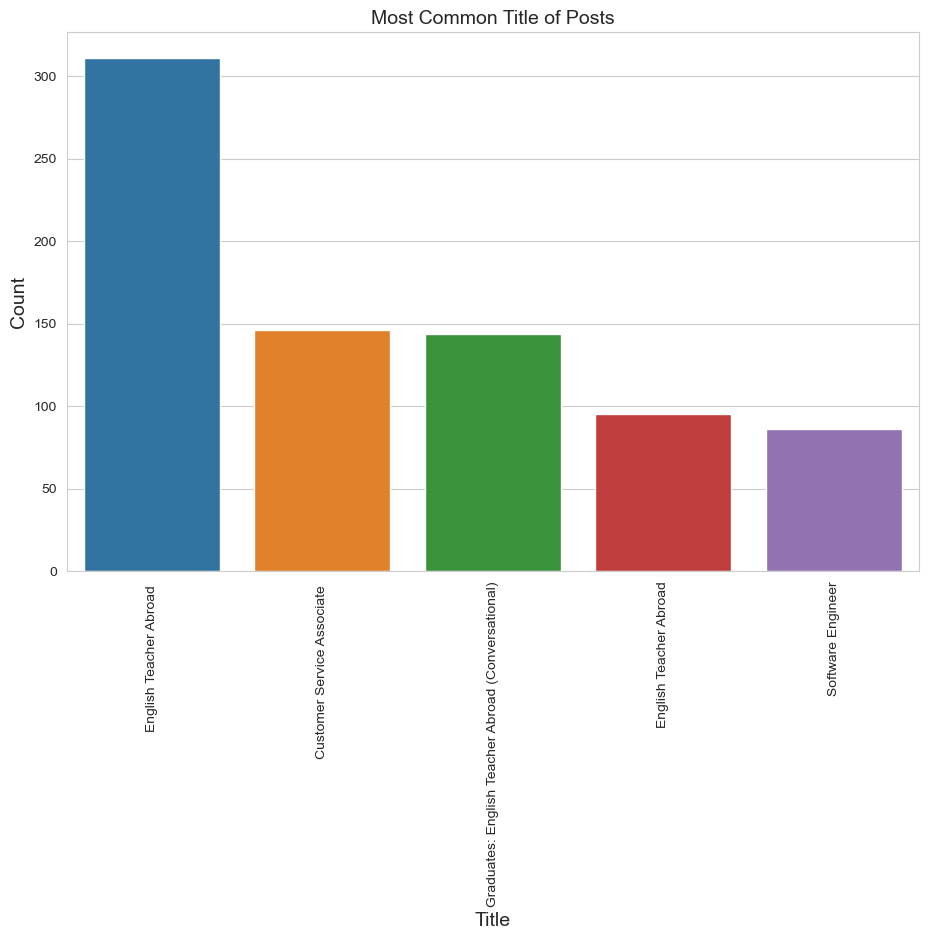

In [21]:
plt.figure(figsize = (11,7))
sns.barplot(x = title.index, y = title )
plt.title("Most Common Title of Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Title", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=90);

In [23]:
location_of_fraudulent = pro.location[pro.fraudulent == 1].value_counts()[:5]

location_of_fraudulent

US, TX, Houston        92
AU, NSW, Sydney        31
US, ,                  28
US, CA, Bakersfield    24
US, CA, Los Angeles    23
Name: location, dtype: int64

In [24]:
location = pro.location.value_counts()[:5]

location

GB, LND, London          1064
US, NY, New York          658
US, CA, San Francisco     472
GR, I, Athens             464
US, ,                     339
Name: location, dtype: int64

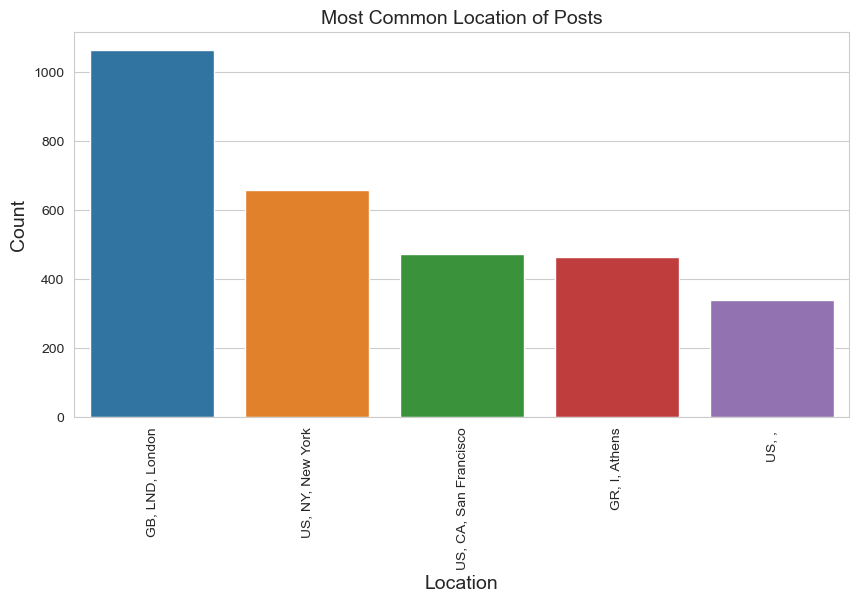

In [25]:
plt.figure(figsize = (10,5))
sns.barplot(x = location.index, y = location )
plt.title("Most Common Location of Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Location", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=90);

In [26]:
employment_type = pro.employment_type.value_counts()

employment_type

Full-time    15091
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

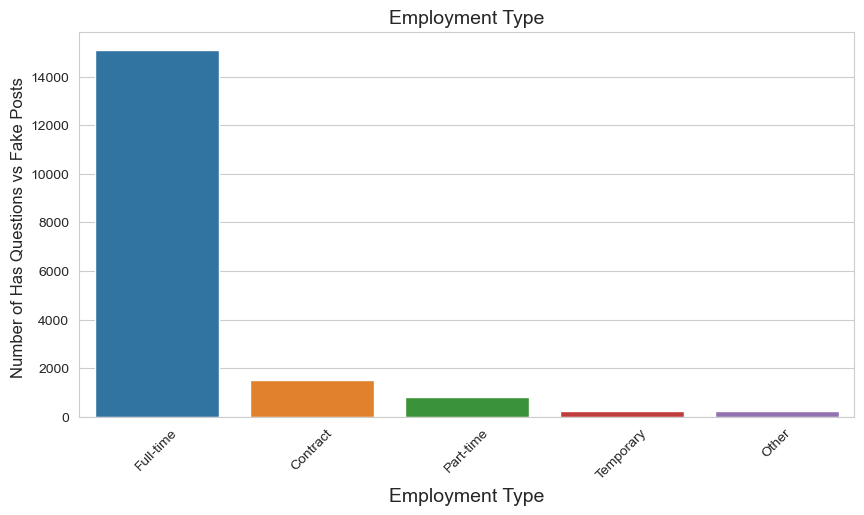

In [27]:
plt.figure(figsize = (10,5))
sns.barplot(x = employment_type.index, y = employment_type)
plt.title("Employment Type", fontdict = {"fontsize" : 14})
plt.xlabel("Employment Type", fontdict = {"fontsize" : 14})
plt.ylabel("Number of Has Questions vs Fake Posts ", fontdict = {"fontsize" : 12})
plt.xticks(rotation = 45);

#### Statistical Analysis

In [75]:
data = pro[['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']]
data.head()

,telecommuting,has_company_logo,has_questions,fraudulent
job_id,,,,
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,1,0


In [76]:
corr = data.corr()
corr

,telecommuting,has_company_logo,has_questions,fraudulent
telecommuting,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.019836,1.000000,0.233932,-0.261971
has_questions,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.034523,-0.261971,-0.091627,1.000000


<AxesSubplot:>

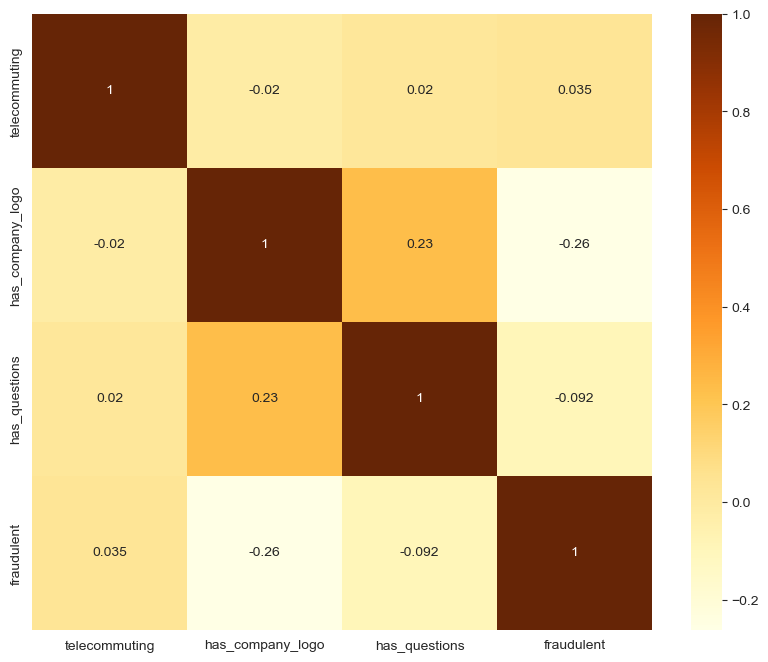

In [84]:
plt.figure(figsize=(10,8))
sns.heatmap(data = corr, annot = True, cmap = 'YlOrBr')

### 4. Feature Scaling of Data

##### Since there are no columns which need Feature Scaling in the Dataset, SO We are Skipping this Step.

### 5. Perform Feature encoding

In [34]:
pro_new = pro[['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent']]
pro_new

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
job_id,,,,,,,
1,0,1,0,Other,Internship,Bachelor's Degree,0
2,0,1,0,Full-time,Not Applicable,Bachelor's Degree,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
5,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
...,...,...,...,...,...,...,...
17876,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
17877,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
17878,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,0


In [35]:
pro_enc = pd.get_dummies(pro_new[['employment_type', 'required_experience', 'required_education']], drop_first = True)
pro_enc

,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,required_experience_Executive,required_experience_Internship,required_experience_Mid-Senior level,required_experience_Not Applicable,...,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
job_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17877,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17878,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
pro_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17880 entries, 1 to 17880
Data columns (total 22 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   employment_type_Full-time                             17880 non-null  uint8
 1   employment_type_Other                                 17880 non-null  uint8
 2   employment_type_Part-time                             17880 non-null  uint8
 3   employment_type_Temporary                             17880 non-null  uint8
 4   required_experience_Director                          17880 non-null  uint8
 5   required_experience_Entry level                       17880 non-null  uint8
 6   required_experience_Executive                         17880 non-null  uint8
 7   required_experience_Internship                        17880 non-null  uint8
 8   required_experience_Mid-Senior level                  17880 non-null  uint8


In [37]:
pro_new = pd.concat([pro_new,pro_enc], axis = 1)
pro_new.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,employment_type_Full-time,employment_type_Other,employment_type_Part-time,...,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
job_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,Other,Internship,Bachelor's Degree,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,Full-time,Not Applicable,Bachelor's Degree,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
pro_new.drop(['employment_type', 'required_experience', 'required_education'], axis = 1, inplace = True)
pro_new.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,...,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
job_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
cor = pro_new.corr()
cor

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,...,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
telecommuting,1.000000,-0.019836,0.020345,0.034523,-0.052763,0.010508,0.014460,-0.019959,0.011944,0.022602,...,-0.008079,0.022189,-0.014365,0.025047,0.016948,0.141042,0.053555,0.004742,-0.003879,-0.004751
has_company_logo,-0.019836,1.000000,0.233932,-0.261971,-0.031289,0.009244,0.000097,0.023239,0.018649,0.068194,...,-0.006103,0.082909,0.015774,-0.016954,0.001618,-0.055236,-0.003634,0.013338,-0.005841,0.005205
has_questions,0.020345,0.233932,1.000000,-0.091627,-0.092986,0.034353,0.001679,0.012122,0.009754,-0.048193,...,-0.011112,-0.011439,0.033724,-0.000675,0.017594,-0.020964,0.026704,0.016918,0.000303,-0.002122
fraudulent,0.034523,-0.261971,-0.091627,1.000000,0.000059,0.009320,0.044686,-0.021853,-0.003287,0.035212,...,-0.001773,0.056274,0.018753,0.001688,-0.006712,0.125409,-0.006467,-0.011827,-0.004134,-0.005063
employment_type_Full-time,-0.052763,-0.031289,-0.092986,0.000059,1.000000,-0.263778,-0.502437,-0.271898,0.051432,-0.089286,...,0.016405,-0.045937,0.025450,-0.017904,-0.073863,0.008779,-0.026471,-0.015794,-0.008955,0.009647
employment_type_Other,0.010508,0.009244,0.034353,0.009320,-0.263778,1.000000,-0.024493,-0.013255,0.000210,-0.007315,...,-0.004327,0.016504,-0.004246,-0.007310,0.071005,-0.004410,0.033996,0.013167,-0.002078,-0.002545
employment_type_Part-time,0.014460,0.000097,0.001679,0.044686,-0.502437,-0.024493,1.000000,-0.025248,-0.030354,0.142197,...,-0.008243,0.182819,-0.015359,0.007183,0.066403,0.005559,0.013863,0.019781,0.010839,-0.004847
employment_type_Temporary,-0.019959,0.023239,0.012122,-0.021853,-0.271898,-0.013255,-0.025248,1.000000,-0.017432,0.004944,...,-0.004461,0.001459,-0.001953,-0.007535,0.049105,-0.004546,0.070788,0.021705,0.024339,-0.002623
required_experience_Director,0.011944,0.018649,0.009754,-0.003287,0.051432,0.000210,-0.030354,-0.017432,1.000000,-0.062853,...,0.014431,-0.051718,0.121941,0.014272,-0.006206,-0.005800,-0.000562,-0.007818,-0.002732,-0.003347
required_experience_Entry level,0.022602,0.068194,-0.048193,0.035212,-0.089286,-0.007315,0.142197,0.004944,-0.062853,1.000000,...,-0.007881,0.428551,-0.043279,-0.022302,0.009575,0.076173,0.038010,0.010788,0.009342,0.004476


<AxesSubplot:>

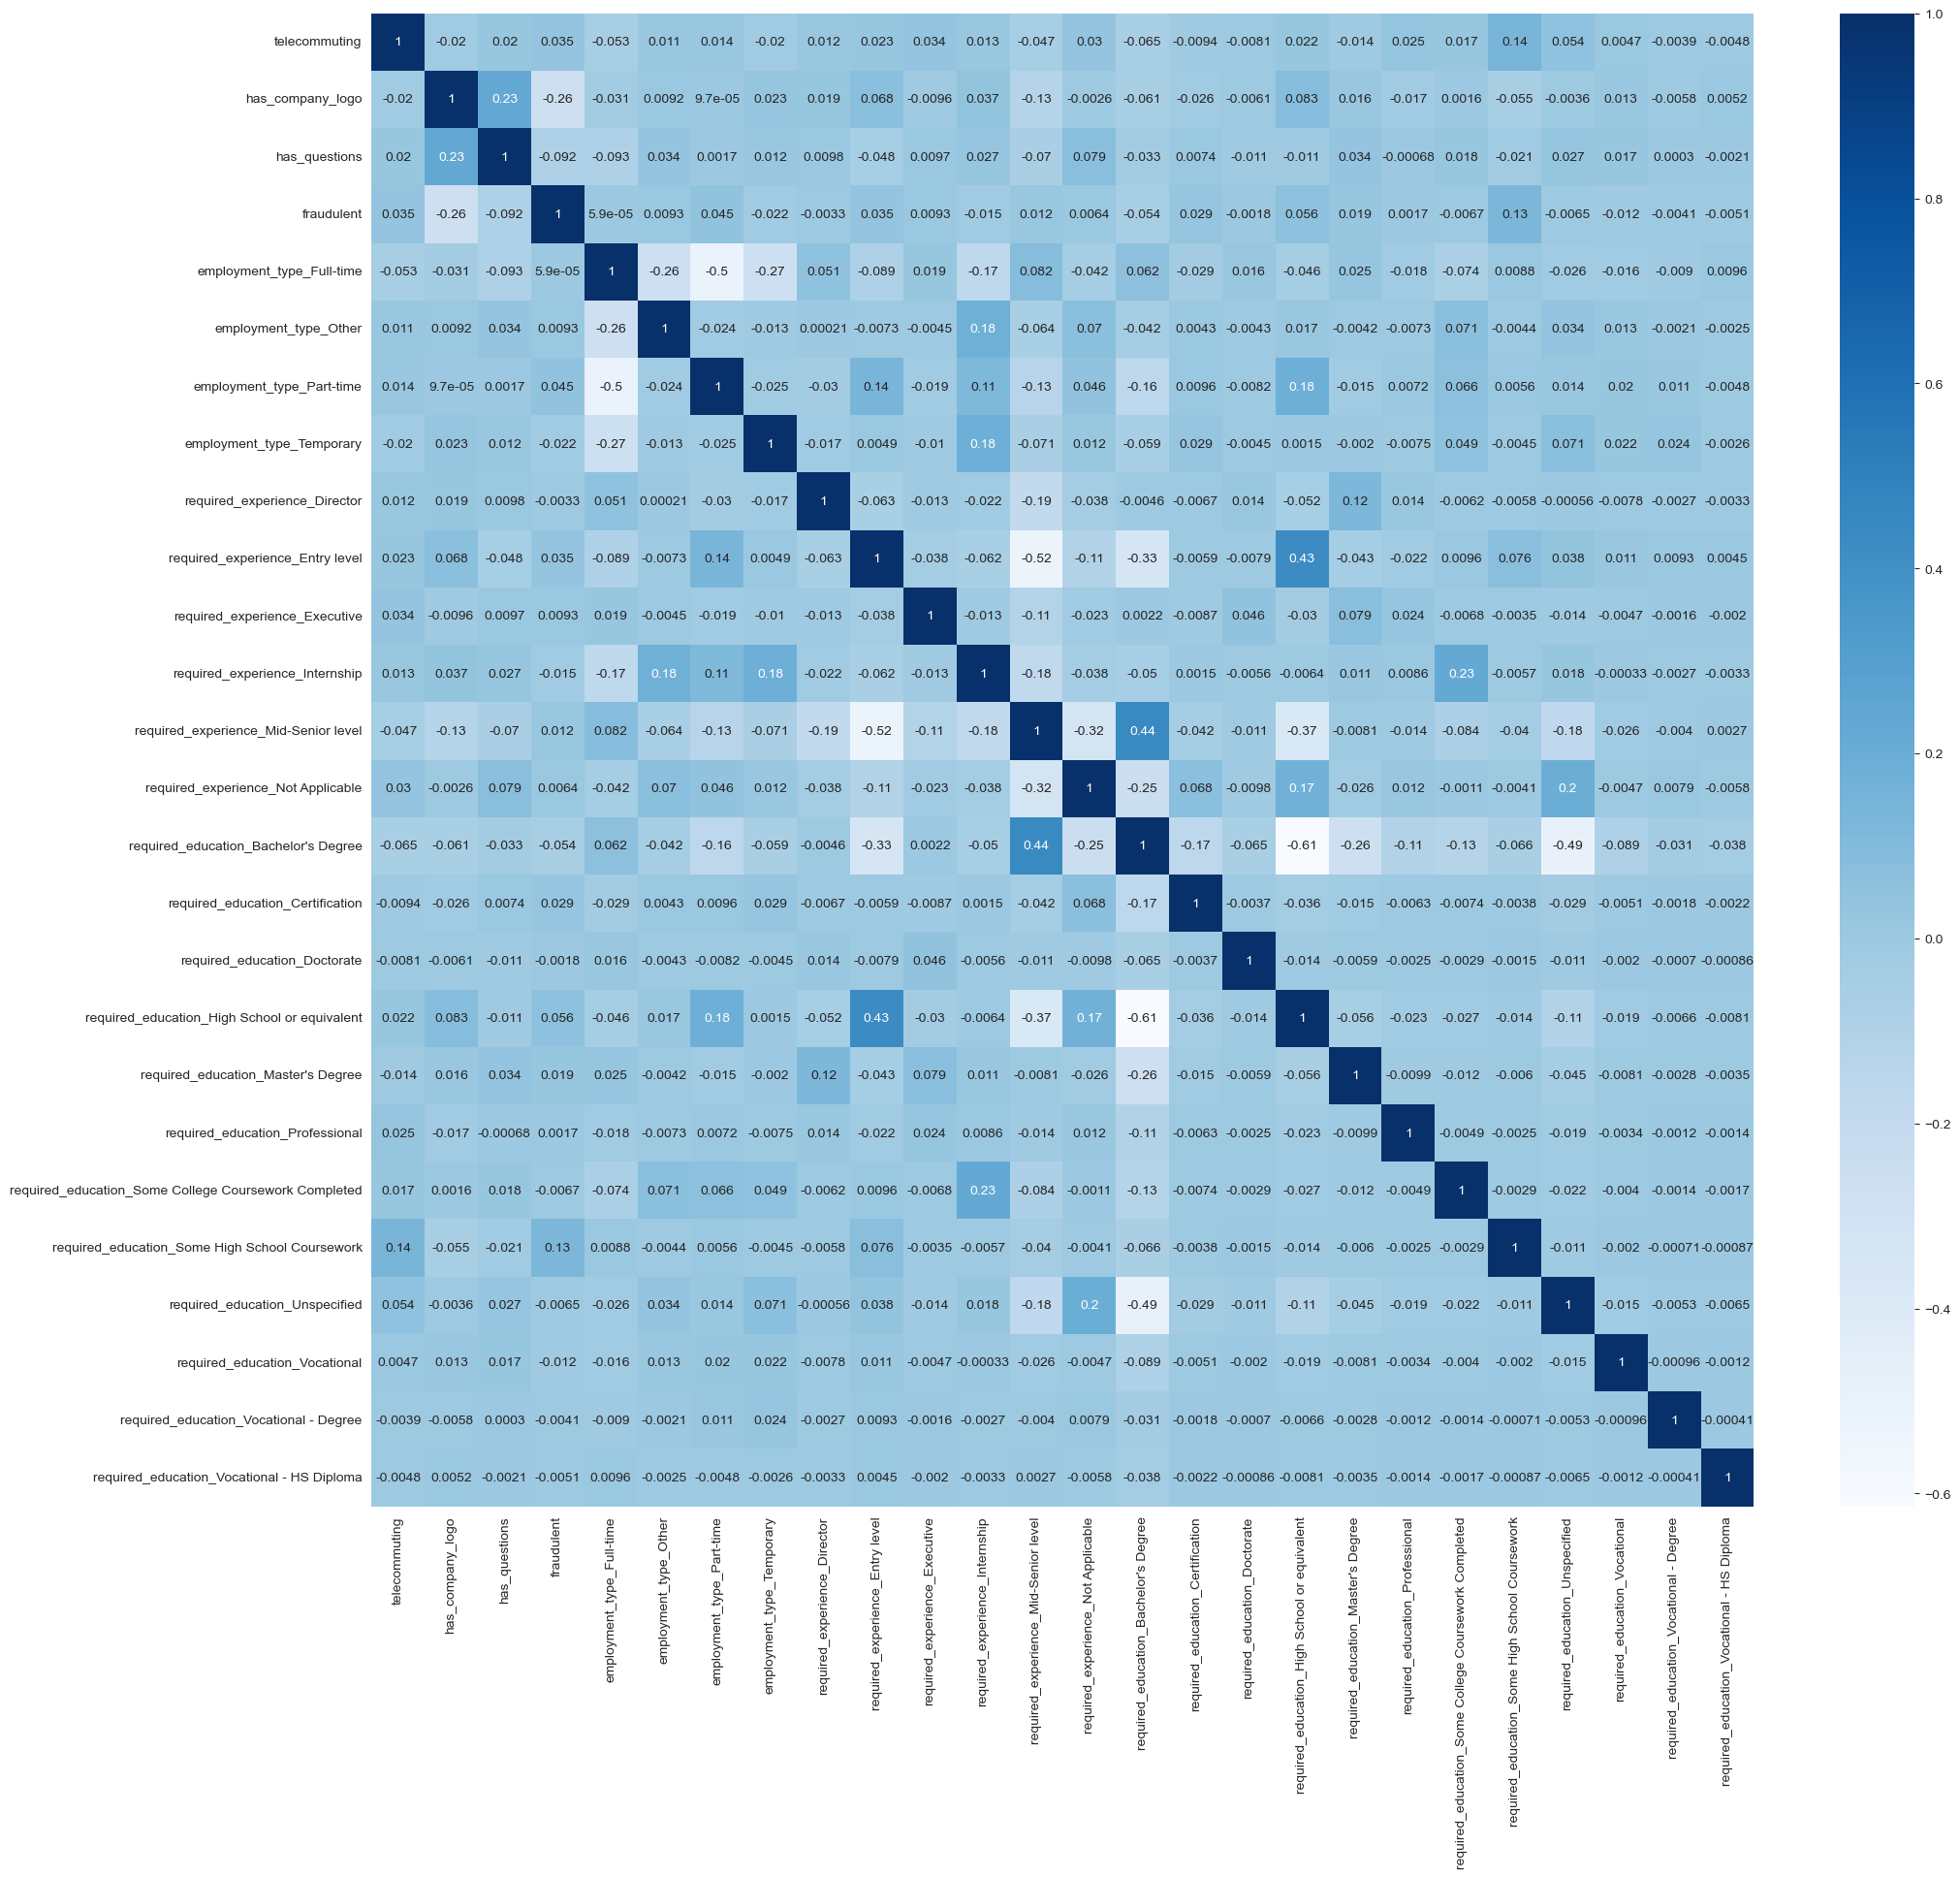

In [90]:
plt.figure(figsize = (23, 20))
sns.heatmap(data = cor, annot =True, cmap = 'Blues')

### 6. Divide the data into train test split

In [91]:
## Divide the data into X and y
a = pro_new.drop('fraudulent', axis = 1)
a.head()

,telecommuting,has_company_logo,has_questions,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,required_experience_Executive,...,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
job_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
b = pro_new['fraudulent']
b.head()

job_id
1    0
2    0
3    0
4    0
5    0
Name: fraudulent, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [109]:
    X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.25, random_state = 101)

### 7. Training and Predicting

#### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [96]:
y_pred = reg.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[4266,    0],
       [ 199,    5]], dtype=int64)

In [98]:
clf = classification_report(y_test, y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4266
           1       1.00      0.02      0.05       204

    accuracy                           0.96      4470
   macro avg       0.98      0.51      0.51      4470
weighted avg       0.96      0.96      0.93      4470



In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) *100

95.54809843400447

#### Decision Tree Classifier

In [54]:
# Gini Index 

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred = dt.predict(X_test)

In [57]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4261,    5],
       [ 183,   21]], dtype=int64)

In [58]:
clf = classification_report(y_test, y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4266
           1       0.81      0.10      0.18       204

    accuracy                           0.96      4470
   macro avg       0.88      0.55      0.58      4470
weighted avg       0.95      0.96      0.94      4470



In [59]:
accuracy_score(y_test, y_pred) *100

95.79418344519016

In [60]:
# ID3 Desicion Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [62]:
y_pred = dt.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred) *100

95.74944071588367

#### Naive Bayes Classifier

In [64]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [65]:
y_pred = nb.predict(X_test)

In [66]:
accuracy_score(y_pred, y_test) * 100

95.52572706935123

#### KNN Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
y_pred = knn.predict(X_test)

In [69]:
accuracy_score(y_pred, y_test) * 100

95.83892617449663

#### Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [103]:
rf.score(X_test, y_test)

0.958165548098434

In [71]:
y_pred = rf.predict(X_test)

In [72]:
accuracy_score(y_pred,y_test) * 100

95.8165548098434

#### PCA

In [101]:
a.shape

(17880, 25)

In [102]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

a_pca = pca.fit_transform(a)

a_pca.shape

(17880, 12)

In [105]:
pca.n_components_

12

In [110]:
X_train, X_test, y_train, y_test = train_test_split(a_pca, b, test_size = 0.25, random_state = 101)

In [111]:
# - Applying PCA on KNN Classifier 

model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9574944071588367

In [ ]:
# - After Applying PCA The Accuracy has reduced from 95.838% to 95.749% which is pretty close 
# - But With the help of PCA the 25 data Columns has been reduced to only 12 columns which indeed produced close accuracy.

- For this Particular Dataset the KNN Classifier has produced the Highest Accuracy Percentage Score which is 95.838% . 